## Linear Regression

In [115]:
# load data from file
# import data from txt
import pandas as pd
def load_data(filename):
    data = []
    file = open(filename)
    for line in file.readlines():
        lineArr = line.strip().split(',')
        temp = []
        for tmp in lineArr:
            temp.append(float(tmp))
        data.append(temp)
    return pd.DataFrame(data, columns = ['A','B'])

In [116]:
# print the data and check the volume
data  = load_data('/Users/mac/Desktop/MLcoursework/ex1-week2-linear regression/ex1/ex1data1.txt')
lst_A = data['A'].values.tolist()
lst_B = data['B'].values.tolist()
one = [1]*len(lst_A)
data.insert(loc = 0, column = 'init', value = one)

print(data.shape)
print(data.iloc[1,1])
print(data.head(10))
print(data.loc[:3,'A'])

(97, 3)
5.5277
   init       A        B
0     1  6.1101  17.5920
1     1  5.5277   9.1302
2     1  8.5186  13.6620
3     1  7.0032  11.8540
4     1  5.8598   6.8233
5     1  8.3829  11.8860
6     1  7.4764   4.3483
7     1  8.5781  12.0000
8     1  6.4862   6.5987
9     1  5.0546   3.8166
0    6.1101
1    5.5277
2    8.5186
3    7.0032
Name: A, dtype: float64


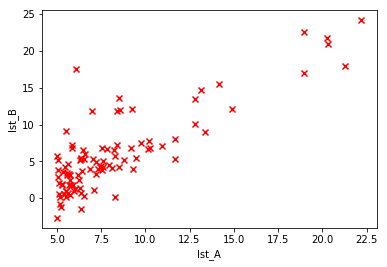

In [117]:
# data visualization, plot data
import matplotlib.pyplot as plt
plt.scatter(lst_A, lst_B, color = 'r', marker = 'x')
plt.xlabel('lst_A')
plt.ylabel('lst_B')
plt.show()

In [118]:
# compute the cost
import numpy as np
def compute_cost(x_test, y_test, theta): # all of them are array type
    y_predict = np.dot(theta, x_test) # y_predict is an numpy array shape(1,97)
    cost = np.sum(0.5 * np.square(y_predict - y_test)) # y_test shape(97,) see the detailed explanation below
    return cost
# check the cost of the data
x_test = np.transpose(np.array(data.iloc[:,:2]))# x_test shape(2,n)
y_test = np.array(data.iloc[:,2])
# theta set as (0,0)
theta1 = np.zeros((1,2))
cost_1 = compute_cost(x_test, y_test, theta1)/len(lst_A)   
# theta set as (-1,2)
theta2 = np.array([[-1,2]])
cost_2 = compute_cost(x_test, y_test, theta2)/len(lst_A) 

print(cost_1)
print(cost_2)

32.0727338775
54.242455082


In [119]:
# gradient descent
def gradient_descent(x_test, y_test, theta, alpha = 0.01, iters = 1500):  # default set the alpha and iters
    J_history = []
    for i in np.arange(iters):     # generator
        # update the theta, using the array multiply
        # need to reflect on this step
        theta = theta - alpha * np.dot((np.dot(theta, x_test)-y_test), np.transpose(x_test))/len(lst_A)         
        cost = compute_cost(x_test, y_test, theta)
        J_history.append(cost)
    return theta, J_history
theta, J_history = gradient_descent(x_test, y_test, np.array([[0.001, 0.001]]))
print(theta)
print('the expected parameter is:', theta)

[[-3.63023197  1.16635638]]
the expected parameter is: [[-3.63023197  1.16635638]]


In [120]:
# prediction as a test
predict1 = np.dot(theta, np.array([[1],[3.5]]))
predict2 = np.dot(theta, np.array([[1],[7]]))
print(predict1*10000,predict2*10000)

[[ 4520.15347702]] [[ 45342.62662719]]


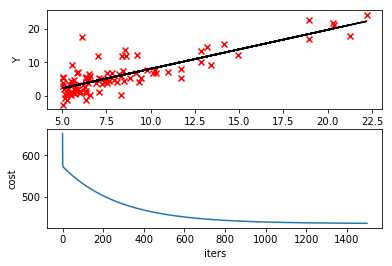

In [121]:
# plot the result, visualize the curve
# plot the original data, together with the predicted data

plt.subplot(211)
plt.scatter(x_test[1:].reshape(-1,1), y_test, marker = 'x', color = 'r' )
plt.plot(x_test[1:].reshape(-1,1), np.transpose(np.dot(theta, x_test)), color = 'black')
plt.xlabel('X')
plt.ylabel('Y')
#plt.show()
# plot the cost
plt.subplot(212)
plt.plot(J_history)
plt.xlabel('iters')
plt.ylabel('cost')
plt.show()

(100, 100) 34.2392060584 30.8100170965


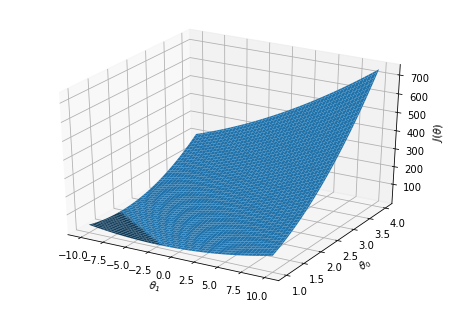

In [144]:
# visualize the 3D graph, because J is influenced by both theta0 and theta1
# visualizing J(theta0, theta1)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

size = 100
theta0Vals = np.linspace(-10, 10, size)
theta1Vals = np.linspace(1, 4, size)
JVals = np.zeros((size,size))
for i in np.arange(size):
    for j in np.arange(size):
        col = np.array([theta0Vals[i], theta1Vals[j]]).reshape(1,-1)
        JVals[i, j] = compute_cost(x_test, y_test,col) / len(lst_A)
theta0Vals, theta1Vals = np.meshgrid(theta0Vals, theta1Vals)
JVals = JVals.T
print (JVals.shape,JVals[0,0],JVals[1,1]) #test correct

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(theta0Vals, theta1Vals, JVals)
ax.set_ylabel(r'$\theta_0$')
ax.set_xlabel(r'$\theta_1$')
ax.set_zlabel(r'$J(\theta)$')
plt.show()

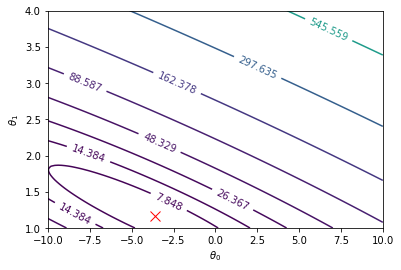

In [147]:
# plot the contour curve, J(theta0, theta1)
contourFig = plt.figure()
ax = contourFig.add_subplot(111)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')

CS = ax.contour(theta0Vals, theta1Vals, JVals, np.logspace(-2,3,20))
plt.clabel(CS, inline=1, fontsize=10)

# 绘制最优解
ax.plot(theta[0,0], theta[0,1], 'rx', markersize=10, linewidth=2)
plt.show()

***

In [254]:
x_test = np.array(data.iloc[:,:2])
y_test = np.array([data.iloc[:,2]])
theta = np.zeros((2,1))
print(x_test.shape)
print(np.dot(x_test,theta).shape)
print(y_test.shape)
print(np.square(np.dot(x_test,theta) - y_test).shape)
0.5*np.sum(np.square(np.dot(x_test,theta) - y_test))

(97, 2)
(97, 1)
(1, 97)
(97, 97)


301772.35305298038

In [256]:
tmp1 = np.array([1,2,3])
print(tmp1.shape)
tmp2 = np.array([[1],[2],[3]])
print(tmp2.shape)
tmp3 = np.array([[1,2,3]])
print(tmp3.shape)
print(tmp2-tmp1)
print(tmp3-tmp1)

(3,)
(3, 1)
(1, 3)
[[ 0 -1 -2]
 [ 1  0 -1]
 [ 2  1  0]]
[[0 0 0]]


In [89]:
np.transpose(tmp)[1,:].reshape(-1,1)

array([[2],
       [2]])

In [95]:
data = np.array([[1,2,3],[1,2,3]])
data

array([[1, 2, 3],
       [1, 2, 3]])